**Topic:**        Challenge Set 10  
**Subject:**      Trees/Forest  
**Date:**         10/23/2017  
**Name:**         Laura Howard

### Challenge 1

In [2]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('house-votes-84.data.txt', sep=",", header=None)
df.columns = ["party_name", "v01", "v02", "v03", "v04", "v05", "v06", "v07", "v08", "v09", "v10",
              "v11", "v12", "v13", "v14", "v15", "v16"]

In [26]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df.replace(('y', 'n', '?'), (1, 0, None), inplace=True)

In [13]:
df = df.fillna(df.median())

In [14]:
df.head()

,party_name,v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,v11,v12,v13,v14,v15,v16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [15]:
selected_col = ["v01", "v02", "v03", "v04", "v05", "v06", "v07", "v08", "v09", "v10",
              "v11", "v12", "v13", "v14", "v15", "v16"]

In [16]:
X = df.loc[:,selected_col]

y = df['party_name']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

In [18]:
rf_model = RandomForestClassifier(n_estimators = 1000, max_depth=10, min_samples_split=3)
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [21]:
test_set_pred = rf_model.predict(X_test)
y_score = rf_model.predict_proba(X_test,)[:,1]
accuracy_score(y_test,test_set_pred)

0.95419847328244278

In [22]:
classification_report(y_test,test_set_pred)

'             precision    recall  f1-score   support\n\n   democrat       0.94      0.99      0.96        77\n republican       0.98      0.91      0.94        54\n\navg / total       0.96      0.95      0.95       131\n'

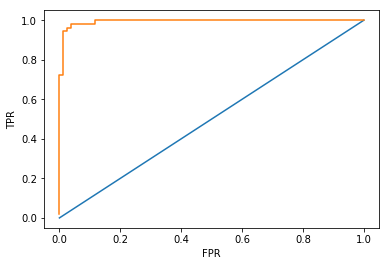

In [28]:
# Plotting ROC
fpr, tpr,_ = roc_curve(y_test, y_score, pos_label='republican')
roc_auc_knn = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR');

This model has a higher precision and lower recall which means that when it does predict poisitive (republican), it is highly accurate (only misclassifies 2% of positive predictions which should be democrat), but it misses quite a few republicans and missclassifies almost 10% of all true republicans as democrats.

In [23]:
sorted(list(zip(X_train.columns, rf_model.feature_importances_)), key=lambda x: x[1], reverse=True)

[('v04', 0.35646498251951936),
 ('v03', 0.13709666772516818),
 ('v12', 0.10569836958394721),
 ('v05', 0.085611687706397946),
 ('v11', 0.067007564088893426),
 ('v09', 0.044045311364193061),
 ('v14', 0.043816816659060343),
 ('v08', 0.039436360304351457),
 ('v15', 0.027832893661890287),
 ('v13', 0.024191126465674891),
 ('v01', 0.01597476992082468),
 ('v07', 0.015971952786909792),
 ('v02', 0.012363850693096222),
 ('v10', 0.011806419070783622),
 ('v16', 0.0071850487383635954),
 ('v06', 0.0054961787109261773)]

Votes for bill 4, 3, 12, and 5 are the most important predictors in this model for identifying repblicans and democrats successfully.

### Challenge 2

In [39]:
with open("2013_movies.csv", "r") as f:
    df_movies = pd.DataFrame.from_csv(f)

In [40]:
df_movies.isnull().sum()

Budget                11
DomesticTotalGross     0
Director               4
Rating                 0
Runtime                0
ReleaseDate            0
dtype: int64

In [41]:
df_movies['Budget'].fillna(df_movies.Budget.mean(), inplace=True)

In [42]:
df_movies.head()

,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
Title,,,,,,
The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [43]:
import datetime as dt
import dateutil.parser

df_movies['ReleaseDate'] = df_movies['ReleaseDate'].map(dateutil.parser.parse)
df_movies['ReleaseMonth'] = df_movies['ReleaseDate'].dt.month

In [48]:
selected_col2 = ["Budget", "DomesticTotalGross", "ReleaseMonth", "Runtime"]

In [49]:
X2 = df_movies.loc[:,selected_col2]

y2 = df_movies['Rating']

In [50]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=4444)

In [59]:
rf_model2 = RandomForestClassifier(n_estimators = 1000, max_depth=4, min_samples_split=3, max_features=2)
rf_model2.fit(X2_train,y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [60]:
test_set_pred2 = rf_model2.predict(X2_test)
y_score2 = rf_model2.predict_proba(X2_test,)[:,1]
accuracy_score(y2_test,test_set_pred2)

0.5

In [61]:
classification_report(y2_test,test_set_pred2)

/Users/mac/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'             precision    recall  f1-score   support\n\n         PG       0.00      0.00      0.00         7\n      PG-13       0.53      0.71      0.61        14\n          R       0.45      0.56      0.50         9\n\navg / total       0.38      0.50      0.43        30\n'

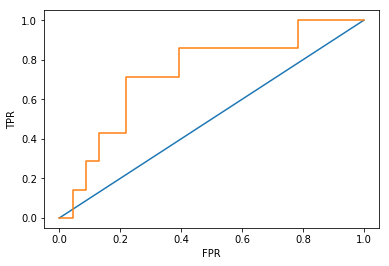

In [63]:
# Plotting ROC
fpr, tpr,_ = roc_curve(y2_test, y_score2, pos_label='PG')
roc_auc_knn = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR');

This model does about twice as good as chance (accuracy of .5) at identifying the rating of a movie based on these predictors. Presumably the small sample size and class imbalance hurts the model predictions (especially with there only being 1 G movie). Average recall is quite a bit better than average precision. This is hard to interpret with a multiclass problem, but basically means that when the model compares one class versus all others, it does a good job at identifying all the movies with that rating, but also has quite a few misclassified movies.

In [62]:
sorted(list(zip(X2_train.columns, rf_model2.feature_importances_)), key=lambda x: x[1], reverse=True)

[('Budget', 0.326903324287595),
 ('Runtime', 0.28884215734151236),
 ('DomesticTotalGross', 0.22445525192241361),
 ('ReleaseMonth', 0.15979926644848044)]

Budget and Runtime are more important than total gross and release month in predicting rating.